# The Concept of Conjugate Gradient Descent in Python

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import itertools

In [8]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])  # we will use the convention that a vector is a column vector
c = 0.0

In [9]:
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

In [10]:
def bowl(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-6, 6, size))
    x2 = list(np.linspace(-6, 6, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
    fig.show()
    return x1, x2, zs

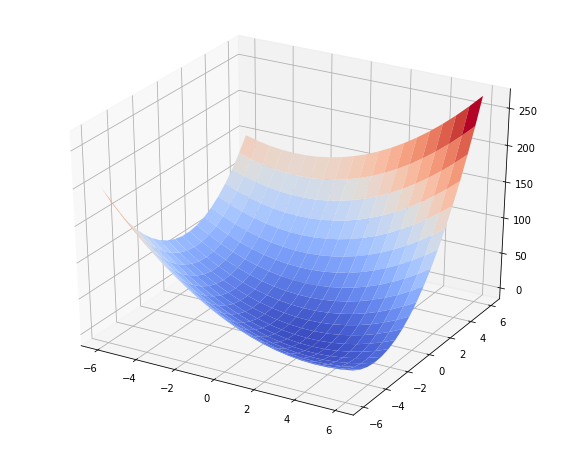

In [11]:
x1, x2, zs = bowl(A, b, c)

In [12]:
def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
    fig.show()

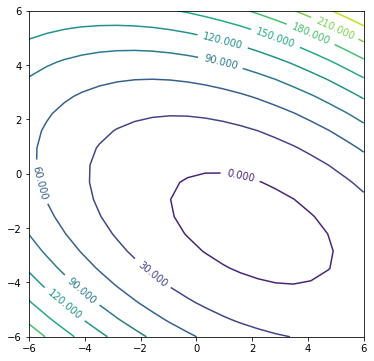

In [13]:
contoursteps(x1, x2, zs)

In [24]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / (r.T * (A * r)))
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = b - A * x
    delta = r.T * r
    i += 1
    

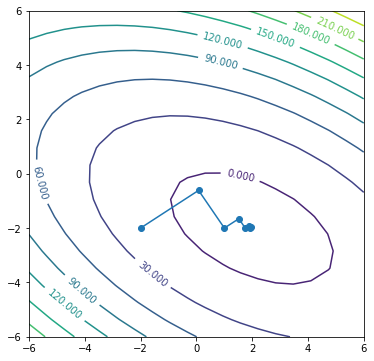

In [18]:
contoursteps(x1, x2, zs, steps)

1
2
3
4
5
6
7
8


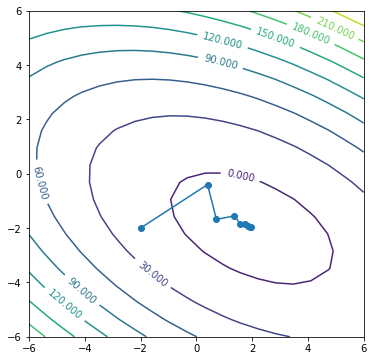

In [39]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10000
eps = 0.01
alpha = 0.2  # play with this value to see how it affects the optimization process, try 0.05, 0.27 and 0.3
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = b - A * x
    delta = r.T * r
    i += 1
    print(i)
contoursteps(x1, x2, zs, steps)

# The Method of Conjudate Directions

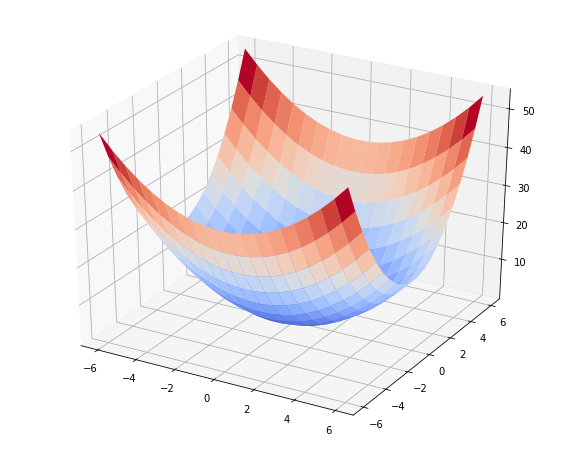

In [42]:
Around = np.matrix([[1, 0],[0, 2]])
bround = np.matrix([[0],[0]])
cround = 0
x1, x2, zs = bowl(Around, bround, cround)

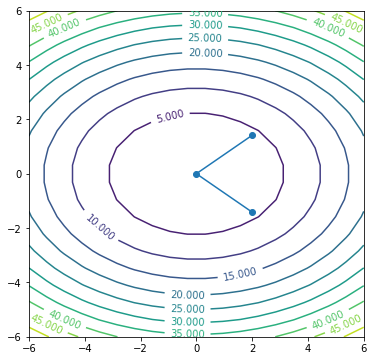

In [43]:
va = np.matrix([[2],[np.sqrt(2)]])
vb = np.matrix([[2],[-np.sqrt(2)]])
contoursteps(x1, x2, zs, [(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

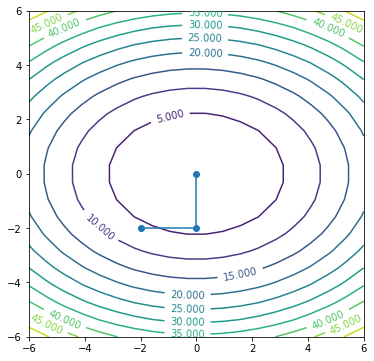

In [46]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = bround - np.matrix([[1, 0],[0, 0]]) * x  # replaced Around with this to force residual to be parallel to X axis
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / (r.T * (Around * r)))
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = bround - Around * x
    delta = r.T * r
    i += 1
contoursteps(x1, x2, zs, steps)

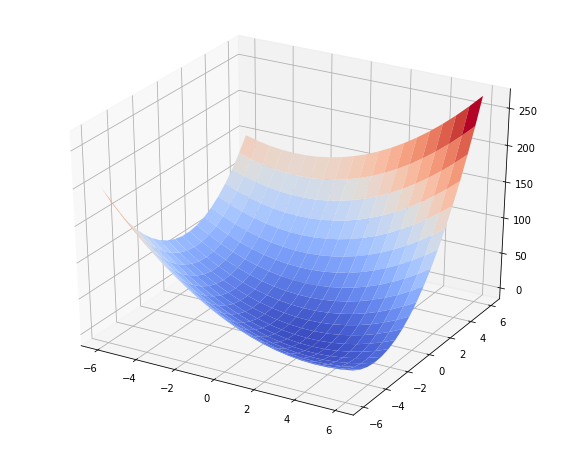

In [47]:
x1, x2, zs = bowl(A, b, c)

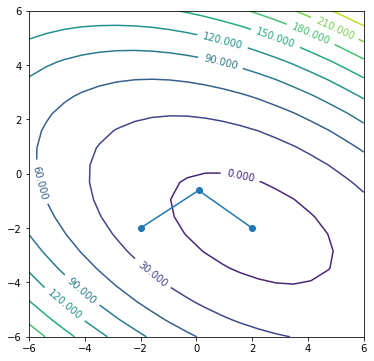

In [48]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
d = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(d.T * (A * d)))
    x = x + alpha * d
    steps.append((x[0, 0], x[1, 0]))
    r = b - A * x
    deltaold = deltanew
    deltanew = r.T * r
    #beta = -float((r.T * A * d) / float(d.T * A * d))
    beta = float(deltanew / float(deltaold))
    d = r + beta * d
    i += 1
contoursteps(x1, x2, zs, steps)